<a href="https://www.kaggle.com/code/fizcogar/intro-ia-1-1-un-ejemplo-como-introducci-n?scriptVersionId=115901922" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Un ejemplo como introducción

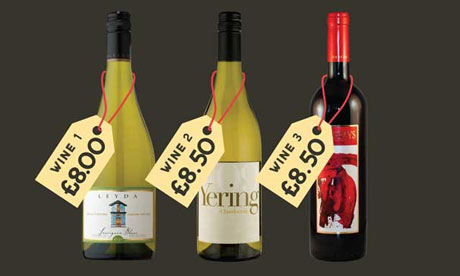

## La ecuación del vino que toca las narices


## La ecuación del vino que toca las narices
### Peter Passell , The New York Times,  4 de marzo de 1990
"Calcule la lluvia durante el invierno y durante la cosecha (en milímetros). Agregue la temperatura en verano en el viñedo (en grados centígrados). Reste 12,145. ¿Que tiene? Una discusión muy, muy apasionada sobre el vino. El profesor Orley Ashenfelter, economista de Princeton, ha ideado una fórmula matemática para predecir la calidad de las cosechas de vino tinto en Francia. Y los guardianes de la tradición están furiosos."

The New York Times
*'Wine Equation Puts Some Noses Out of Joint'*
By Peter Passell
March 4, 1990

https://www.nytimes.com/1990/03/04/us/wine-equation-puts-some-noses-out-of-joint.html

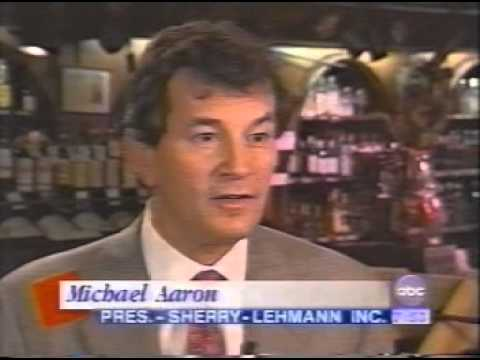

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ec8hPHLMyzY')

## Tésis del Prof. Ashenfelter: Tomar DECISIONES basadas en DATOS  en lugar de en sensaciones:

* Los buenos vinos mejoran con la edad. También aumentan de precio.
* Es buena idea comprar un vino cuando es joven, suponiendo que va a envejecer bien.

Por entonces la predicción de la futura calidad de los vinos se basaban en las **sensaciones** de los expertos, que probaban el vino joven para estimar la calidad futura.

La tesis del prof. Ashenfelter era:
* Que la **meteorología** durante el año de crecimiento y maduración de la uva era el principal factor de la **diferencia de calidad** de un vino de una bodega concreta **de un año a otro**.

## Tomar decisiones (que vinos jóvenes comprar) basadas en datos (meteorología) en lugar de en sensaciones (propiedades organolépticas del vino joven)

Esta es la idea: el profe va a la tienda de vinos y ve **una botella de 'Château Lafite' del año a diez libras**. Para decidir si comprarla o no, calcula cuánto costará dentro de, digamos, cinco años. Consulta los datos meteorológicos en **'Météo-France'** y aplica la fórmula mágica. Dependiendo del precio, comprará o no.

---

$prediccion\_precio = -3.6516 + 0.6164 \cdot  TemperaturaMediaVerano + 0.0012 \cdot LluviaInvierno - 0.0039 \cdot  LluviaCosecha +  0.0238 \cdot  Edad$

---

# Definición del problema

Predecir el precio que alcanzará un vino en función de los datos meteorológicos durante el año de crecimiento y cosecha de la uva.

$\hat y = f(x)$

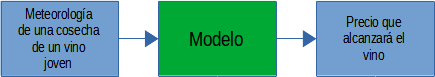

# ¿Cómo lo hizo?

La ciencia de datos es un problema iterativo, experimental, **de prueba y error**. Sólo conocemos el resultado final de sus experimentos, el modelo final, pero **vamos a imaginarnos** cómo pudo llegar a ese resultado.

## La ciencia de datos es un proceso iterativo (experimentación)

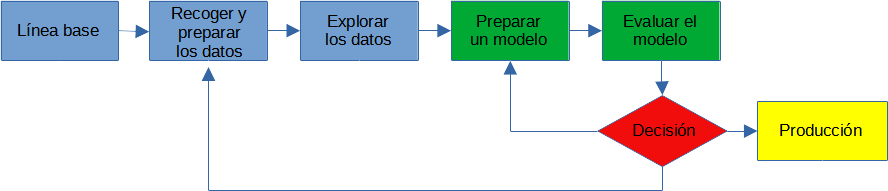

## ¿Línea base?

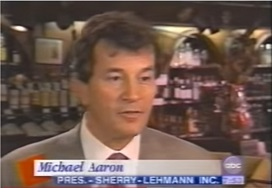

Una línea base es **el punto de inicio** que nos da una medida de **lo bien o mal que lo hacemos con el método actual de predicción**. Nos sirve para **compararlo con los nuevos métodos** y ver si estamos mejorando o no.

En este caso, si hubiese un registro fiable de las predicciones de los expertos (tal vez en viejas revistas de vinos) podríamos establecer una línea base. Pero seguramente estos expertos no se arriesgaron a estimar el precio que iban a alcanzar los vinos, así que no podríamos hacer una comparación válida.

Así que vamos a suponer que el profesor tenía razón, y que estimar la calidad futura del vino probando el vino joven no tenía sentido alguno, así que nuestra línea base va a ser elegir un precio futuro **aleatorio** en el rango de los precios mínimo y máximo de la tabla.

## Recoger y preparar los datos

Sin entrar en cómo recogió los datos, ni porqué esos datos en concreto, los datos son:
* Los datos **meteorológicos** de 27 cosechas de bodegas de Burdeos y Borgoña
* El **precio**(1) que alcanzaron esos vinos en las subastas
* La **'edad'** del vino en el momento de la subasta

(1) Al profe no le interesa el **precio futuro**, sino **la calidad**: no quiere hacer negocio, quiere beber el mejor vino dentro de su presupuesto. ¿Por qué predecir entonces el precio? Porque es un **dato objetivo** que está directamente relacionado con la calidad.

## Los datos

La primera fila podría interpretarse como "Durante el año 1952 en una viña concreta llovieron 600 mm/m2 durante el invierno y 160 mm/m2 durante la época de cosecha, siendo la temperatura media en verano de 17.11 ºC. 31 años después esa cosecha alcanzó un precio de casi 7.5"

In [2]:
import pandas as pd

data = pd.read_csv('/kaggle/input/meteo-vinos/meteo.vinos.csv')
data

,Año,LluviaInvierno,TemperaturaMediaVerano,LluviaCosecha,Edad,Precio
0,1952,600,17.1167,160,31,7.4950
1,1953,690,16.7333,80,30,8.0393
2,1955,502,17.1500,130,28,7.6858
3,1957,420,16.1333,110,26,6.9845
4,1958,582,16.4167,187,25,6.7772
5,1959,485,17.4833,187,24,8.0757
6,1960,763,16.4167,290,23,6.5188
7,1961,830,17.3333,38,22,8.4937
8,1962,697,16.3000,52,21,7.3880
9,1963,608,15.7167,155,20,6.7127


## Exploración de los datos

Es difícil extraer conclusiones de la tabla, mejor vamos mostrar gráficamente la relación entre las distintas variables meteorológicas (entrada del modelo) y el precio (salida del modelo).

Podemos ver, como tendencias, lo que dice el profe en el video: las mejores condiciones para la uva son un invierno lluvioso, un verano cálido y una época de cosecha poco lluviosa.

Text(0, 0.5, 'Precio')

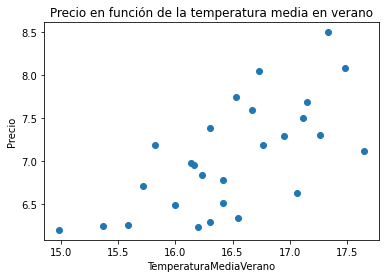

In [3]:
import matplotlib.pyplot as plt

plt.scatter(data['TemperaturaMediaVerano'].values, data['Precio'].values)
plt.title("Precio en función de la temperatura media en verano")
plt.xlabel("TemperaturaMediaVerano")
plt.ylabel("Precio")

Text(0, 0.5, 'Precio')

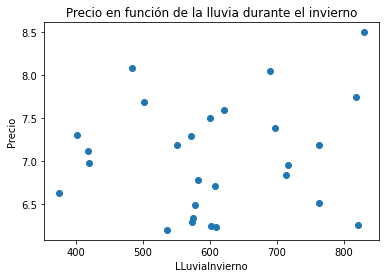

In [4]:
plt.scatter(data['LluviaInvierno'].values, data['Precio'].values)
plt.title("Precio en función de la lluvia durante el invierno")
plt.xlabel("LLuviaInvierno")
plt.ylabel("Precio")

Text(0, 0.5, 'Precio')

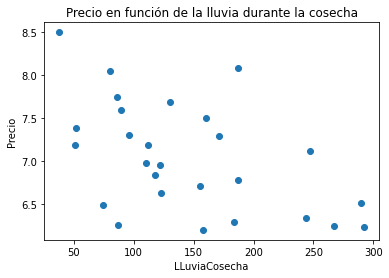

In [5]:
plt.scatter(data['LluviaCosecha'].values, data['Precio'].values)
plt.title("Precio en función de la lluvia durante la cosecha")
plt.xlabel("LLuviaCosecha")
plt.ylabel("Precio")

Text(0, 0.5, 'Precio')

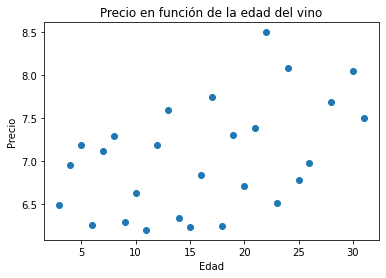

In [6]:
plt.scatter(data['Edad'].values, data['Precio'].values)
plt.title("Precio en función de la edad del vino")
plt.xlabel("Edad")
plt.ylabel("Precio")

## LInea base aleatoria

Nuestro primer 'modelo' va a establecer una línea base aleatoria, y evaluaremos el resultado para poder compararlo luego con los siguientes modelos.

In [7]:
import numpy as np
# Para que sea repoducible:
np.random.seed(666)
# El rango de los valores aleatorios lo marcan el precio mínimo y el máximo:
precio_min, precio_max = np.min(data['Precio']), np.max(data['Precio'])

In [8]:
def linea_base(tmv):
    return np.random.uniform(precio_min, precio_max)

## Evaluación del modelo

Para evaluar el modelo necesitamos **un número que nos diga lo bien o mal que lo hace nuestro modelo**, para poder **compararlo con otros modelos**. ¿Cómo? Fácil. Calcularemos el **error medio** que comete nuestro modelo **al predecir** los precios del vino de las cosechas de la tabla de datos recopilados por el profe.

Para calcularlo vamos a crear **dos nuevas columnas** en la tabla, una con las **predicciones del modelo** y otra con el **error cometido**, que no es otra cosa que la diferencia entre la predicción y el precio real. Después calcularemos una **media de todos los errores**.

In [9]:
# Calculamos una nueva columna con la predicción del modelo línea base:
data['y_pred_0'] = [linea_base(item) for item in data['TemperaturaMediaVerano']]

# Y en otra columna el error cometido, que es la diferencia entre la predicción y el precio real:
data['error_0'] = data['y_pred_0'] - data['Precio']
data

,Año,LluviaInvierno,TemperaturaMediaVerano,LluviaCosecha,Edad,Precio,y_pred_0,error_0
0,1952,600,17.1167,160,31,7.4950,7.808060,0.313060
1,1953,690,16.7333,80,30,8.0393,8.137074,0.097774
2,1955,502,17.1500,130,28,7.6858,7.753306,0.067506
3,1957,420,16.1333,110,26,6.9845,7.870822,0.886322
4,1958,582,16.4167,187,25,6.7772,8.382597,1.605397
5,1959,485,17.4833,187,24,8.0757,6.233975,-1.841725
6,1960,763,16.4167,290,23,6.5188,7.151520,0.632720
7,1961,830,17.3333,38,22,8.4937,6.316623,-2.177077
8,1962,697,16.3000,52,21,7.3880,6.433616,-0.954384
9,1963,608,15.7167,155,20,6.7127,7.367762,0.655062


Pregunta: ¿Sería una buena medida del error la **media aritmética** de los errores? No, porque los errores positivos y negativos se anularían. Hay muchas formas de calcular el error medio. Una de las más conocidas es la **Raíz del error cuadrático medio (rmse)**

$$RMSE = \sqrt {\frac{1}{N} \sum_{i=1}^{N} (\hat{y_{i}} - y_{i})^2}$$

Simplemente calculamos **la media del cuadrado de los errores** (ya no tenemos el problema de que los positivos anulen a los negativos), y finalmente calculamos la **raiz cuadrada de esa media**.


In [10]:
from sklearn.metrics import mean_squared_error

errores = pd.DataFrame(columns=['Modelo', 'Error (rmse)'])
errores.loc[len(errores)] = ['Linea base', mean_squared_error(data['Precio'], data['y_pred_0'], squared=False)]
errores

,Modelo,Error (rmse)
0,Linea base,1.03661


## Primer modelo : Programación 'tradicional'

Empezamos por el modelo más **simple**. La temperatura media durante el verano tiene la **tendencia más clara** en relación con el precio: a menor temperatura, menor precio. Este modelo va a predecir **sólo dos precios**, 6.5 si la temperatura ha sido menor que 16.5 ºC y 8 si ha sido mayor.

Esos dos valores están calculados ... a 'ojo'

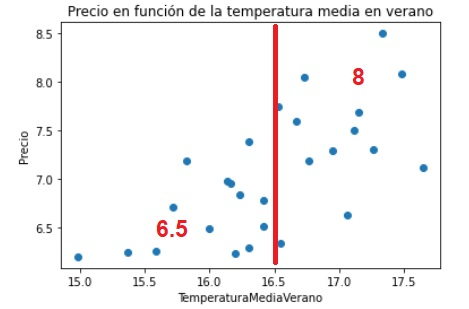

In [11]:
def predict(tmv):
    if tmv <= 16.5:
        return 6.5
    else:
        return 8

### Evaluación del modelo:

Hacemos lo mismo que para evaluar la línea base. De hecho **tenemos que hacer lo mismo** para poder comparar los errores.

In [12]:
# Inferencia:
data['y_pred_1'] = [predict(item) for item in data['TemperaturaMediaVerano']]
data['error_1'] = data['y_pred_1'] - data['Precio']
data

,Año,LluviaInvierno,TemperaturaMediaVerano,LluviaCosecha,Edad,Precio,y_pred_0,error_0,y_pred_1,error_1
0,1952,600,17.1167,160,31,7.4950,7.808060,0.313060,8.0,0.5050
1,1953,690,16.7333,80,30,8.0393,8.137074,0.097774,8.0,-0.0393
2,1955,502,17.1500,130,28,7.6858,7.753306,0.067506,8.0,0.3142
3,1957,420,16.1333,110,26,6.9845,7.870822,0.886322,6.5,-0.4845
4,1958,582,16.4167,187,25,6.7772,8.382597,1.605397,6.5,-0.2772
5,1959,485,17.4833,187,24,8.0757,6.233975,-1.841725,8.0,-0.0757
6,1960,763,16.4167,290,23,6.5188,7.151520,0.632720,6.5,-0.0188
7,1961,830,17.3333,38,22,8.4937,6.316623,-2.177077,8.0,-0.4937
8,1962,697,16.3000,52,21,7.3880,6.433616,-0.954384,6.5,-0.8880
9,1963,608,15.7167,155,20,6.7127,7.367762,0.655062,6.5,-0.2127


In [13]:
errores.loc[len(errores)] = ["Programa 'tradicional'", mean_squared_error(data['Precio'], data['y_pred_1'], squared=False)]
errores

,Modelo,Error (rmse)
0,Linea base,1.036610
1,Programa 'tradicional',0.611271


Hemos reducido el error de la línea base a la mitad. Nuestro modelo es mejor que tirar una moneda al aire :)

## Segundo modelo: otro intento de programación 'tradicional'

No estamos satisfechos con el resultado, así que en una segunda iteración encontramos un modelo mucho más sofisticado: imaginamos **una línea recta que se 'ajuste'** a los valores de precios y temperaturas, de manera que el nuevo modelo calcule el precio en función de la temperatura según la **ecuación de una recta**.

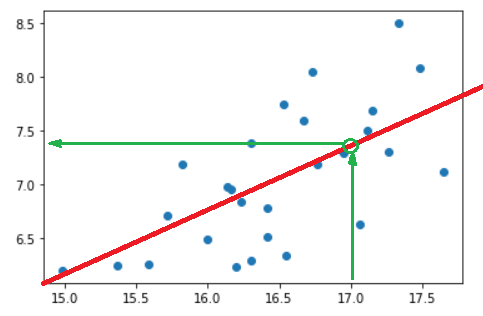

In [14]:
# Una tmv de 14.8 corresponde aprox con un precio de 6
# Una tmv de 17.5 corresponde aprox con un precio de 7.75
# Ecuación de una recta que pasa por dos puntos:

def predict(tmv):
    return -3.62 + tmv * 0.65    

### Evaluación del modelo

In [15]:
# Inferencia:
data['y_pred_2'] = [predict(item) for item in data['TemperaturaMediaVerano']]
data['error_2'] = data['y_pred_2'] - data['Precio']
data

,Año,LluviaInvierno,TemperaturaMediaVerano,LluviaCosecha,Edad,Precio,y_pred_0,error_0,y_pred_1,error_1,y_pred_2,error_2
0,1952,600,17.1167,160,31,7.4950,7.808060,0.313060,8.0,0.5050,7.505855,0.010855
1,1953,690,16.7333,80,30,8.0393,8.137074,0.097774,8.0,-0.0393,7.256645,-0.782655
2,1955,502,17.1500,130,28,7.6858,7.753306,0.067506,8.0,0.3142,7.527500,-0.158300
3,1957,420,16.1333,110,26,6.9845,7.870822,0.886322,6.5,-0.4845,6.866645,-0.117855
4,1958,582,16.4167,187,25,6.7772,8.382597,1.605397,6.5,-0.2772,7.050855,0.273655
5,1959,485,17.4833,187,24,8.0757,6.233975,-1.841725,8.0,-0.0757,7.744145,-0.331555
6,1960,763,16.4167,290,23,6.5188,7.151520,0.632720,6.5,-0.0188,7.050855,0.532055
7,1961,830,17.3333,38,22,8.4937,6.316623,-2.177077,8.0,-0.4937,7.646645,-0.847055
8,1962,697,16.3000,52,21,7.3880,6.433616,-0.954384,6.5,-0.8880,6.975000,-0.413000
9,1963,608,15.7167,155,20,6.7127,7.367762,0.655062,6.5,-0.2127,6.595855,-0.116845


In [16]:
errores.loc[len(errores)] = ["Programa 'tradicional' 2", mean_squared_error(data['Precio'], data['y_pred_2'], squared=False)]
errores

,Modelo,Error (rmse)
0,Linea base,1.036610
1,Programa 'tradicional',0.611271
2,Programa 'tradicional' 2,0.466241


De nuevo hemos reducido el error cometido por el anterior modelo.

## Tercer modelo: Regresión Lineal

### El método del Profesor Ashenfelter

### Regresión lineal

* Partimos de un conjunto de **datos de entrenamiento**
* Y un **Modelo** matemático (modelo lineal) que depende de unos **parámetros** $\hat y = f_A(X)$. Es decir, una **fórmula flexible**.
  * Modelo lineal, en general:
    * $\hat y = \alpha_0 + \alpha_1 \cdot  x_1 + \alpha_2 \cdot x_2 + \cdot\cdot\cdot + \alpha_n \cdot  x_n$
  * Modelo lineal del profesor Ashenfelter
    * $prediccion\_precio = \alpha_0 + \alpha_1 \cdot  TemperaturaMediaVerano + \alpha_2 \cdot LluviaInvierno + \alpha_3 \cdot  LluviaCosecha +  \alpha_4 \cdot  Edad$
* **Entrenamiento del modelo**, mediante un método de **optimización** para obtener un **error mínimo**.

**Calcular los parámetros** para que la predicción sea lo más precisa posible, **minimizando el error cometido** es un problema de **optimización**. El más conocido se denomina **Descenso de gradiente**.

### Para entenderlo, vamos a simplificar a una sola variable (y dos parámetros)

$prediccion\_precio\_vino = \alpha_0 + \alpha_1 \cdot  temperatura\_verano$

(Simplificamos para poder representarlo gráficamente. Con una variable necesiamos un gráfico de dos dimensiones. Con dos variables, tres dimensiones. Con cuatro variables ... cinco dimensiones). Yo ya tengo problemas para interpretar gráficos en tres dimensiones, así que con uno de cinco dimensiones ...)

### Regresión lineal con descenso de gradiente en Python
Simplificado a una sóla variable de entrada

In [17]:
# Función de pérdida
def loss(y_hat, y):
    # La función de pérdida es, como siempre, una media de los errores.
    # En este caso, la mitad del error medio cuadrático (mse)
    return 0.5 * np.square(y_hat-y).mean() 
    
class RegresionLinealSimplificada:
    
    def __init__(this, a0 = 0, a1 = 0):
        # Parámetros del modelo:
        this.a0 = a0
        this.a1 = a1
        
    # Predicción según un modelo lineal (simplifiada a una sola variable):    
    def predict(this, x):
        return this.a0 + this.a1 * x
    
    # Una época es un ciclo de entrenamiento (un paso) de descenso de gradiente. La función espera:
    # - Los datos meteorologicos de todas las cosechas (x)
    # - Los precios reales alcanzados (y)
    # - Un 'hiperparámetro' (lr), el rátio de aprendizaje (learning rate)
    def epoch(this, x, y, lr):
        y_hat = this.predict(x)
        grad_a0 = (y_hat - y).mean()
        grad_a1 = (x * (y_hat - y)).mean()  
        this.a0 = this.a0 - lr * grad_a0
        this.a1 = this.a1 - lr * grad_a1

In [18]:
# Cada vez que ejecutemos esta función, ejecutamos un ciclo 
# de entrenamiento (una época) y dibujamos los valores reales (en azul)
# y las predicciones (en rojo)

def epoch_graf(model, x, y, lr):
    # Predicción y error medio:
    y_hat = model.predict(x)
    perdida = loss(y_hat, y)

    # Los dibujamos:
    print("Parámetros. ", "a0:", model.a0, "a1:", model.a1)
    print("Pérdida:", perdida)
    plt.scatter(x, y, color='blue');
    plt.scatter(x, y_hat, color='red');
    plt.show()

    # Un ciclo de entrenamiento:
    model.epoch(x, y, lr)
    
# Instancia del modelo
modelo = RegresionLinealSimplificada()

# Datos de entrenamiento: la temperatura media en verano y los precios
x = data['TemperaturaMediaVerano'].values
y = data['Precio'].values

----

Parámetros.  a0: 0 a1: 0
Pérdida: 24.988411585185187


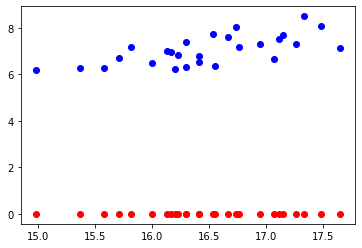

Parámetros.  a0: 0.021125844444444444 a1: 0.3489137291944444
Pérdida: 0.9338982127848036


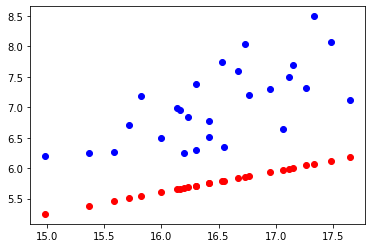

Parámetros.  a0: 0.024940338798890974 a1: 0.4121368191745973
Pérdida: 0.14412801535101094


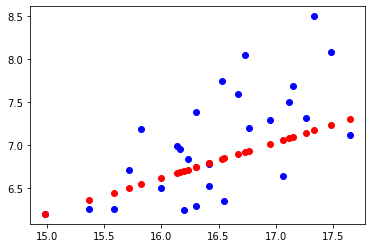

In [19]:
# Para la versión estática del cuaderno
for n in range(3):
    epoch_graf(modelo, x, y, 0.003)

-----

Parámetros.  a0: 0.02561806088644316 a1: 0.4235934965362174
Pérdida: 0.11819778813410806


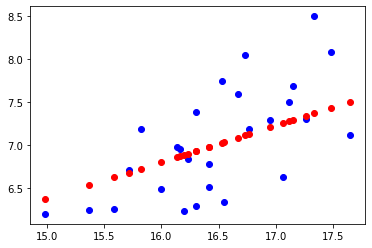

In [20]:
lr = 0.0008 #  # probar con lr=0.0008 lr = 0.003 y lr = 005 y lr = 0.008
epoch_graf(modelo, x, y, lr)

Y en algún momento tendríamos nuestra propia formula mágica simplificada:

---

$prediccion\_precio = 0.0257 + 0.426 \cdot  TemperaturaMediaVerano$

---


**¿No os recuerda esto a algo?**

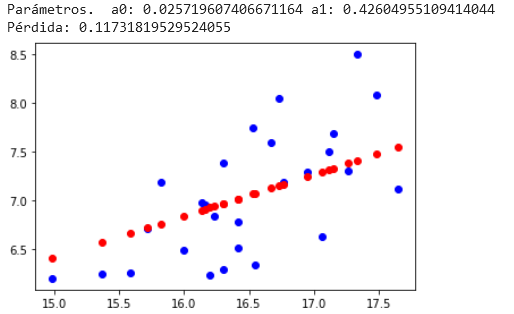 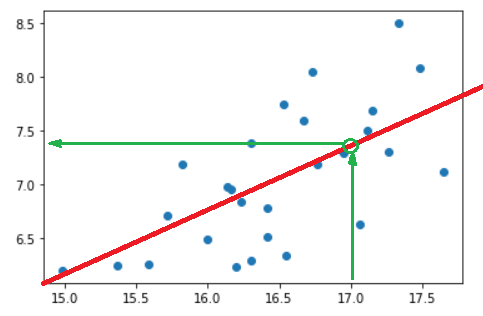

A nuestro **segundo modelo**, en el que definíamos 'a ojo' una recta que se ajustaba a las predicciones de la tabla. El **modelo lineal, con una sóla variable** $\hat y = \alpha_0 + \alpha_1 \cdot  x_1 $ es la **ecuación de una recta**. La diferencia es que con la regresión lineal el valor de los parámetros  que definen la recta calculados por **descenso de gradiente** hacen que el modelo cometa **el mínimo error posible**.


### ¡Importante! 
* Cada ciclo de entrenamiento implica **sumas y multiplicaciones** 
  * de **todo** el conjunto de datos 
  * por **cada uno** de los parámetros (en la función *'epoch'* del modelo, x e y son vectores).
* El **número de iteraciones** necesarias para llegar al resultado lo determina el **ratio de aprendizaje**
  * Es un hiperparámetro, no se aprende, hay que **'experimentar'** para encontrar un valor óptimo.

### Función de pérdida

¿Cómo evoluciona la pérdida? Para ver cómo es la **forma de la función de pérdida** conforme entrenamos el modelo.

In [21]:
# Cada vez que se llame a esta función, ejecutamos un ciclo 
# de entrenamiento (una época) y dibujamos el valor de la pérdida,
# para ver la forma de la función de pérdida.

def fit_2(model, x, y, lr):
    global epoca
    # Predicción y error:
    y_hat= model.predict(x)
    perdida = loss(y_hat, y)
    # Guardamos los valores de la iteración y de la pérdida en dos listas, para dibujar todos los puntos
    epocas.append(epoca)
    perdidas.append(perdida)
    # Dibujamos la función de pérdida
    print("Época:", epoca)
    print("Pérdida:", perdida)
    plt.axis([0, 20, 0, 30])
    plt.scatter(epocas, perdidas) # Prueba plt.plot(iteraciones, perdidas)
    plt.plot(epocas, perdidas)
    plt.title("Pérdida en función del entrenamiento")
    plt.xlabel("Épocas")
    plt.ylabel("Pérdida")
    plt.show()
    
    # Un ciclo de entrenamiento:
    model.epoch(x, y, lr)
    epoca = epoca + 1
    
modelo = RegresionLinealSimplificada()
epocas = []
perdidas = []
epoca = 1

Cada ejecución de la siguiente celda ejecuta un **ciclo de entrenamiento (una época)** y dibuja la **pérdida** correspondiente.

------

Época: 1
Pérdida: 24.988411585185187


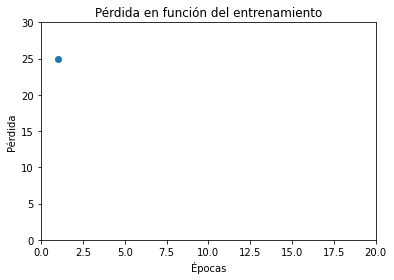

Época: 2
Pérdida: 5.246621069757982


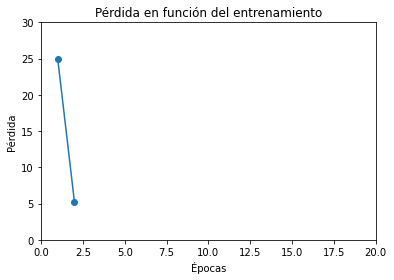

Época: 3
Pérdida: 1.1751622996219655


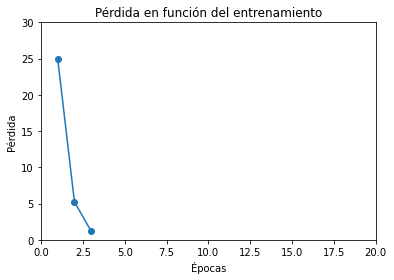

Época: 4
Pérdida: 0.33548277546508193


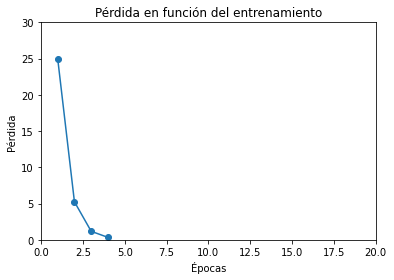

Época: 5
Pérdida: 0.16231097204509692


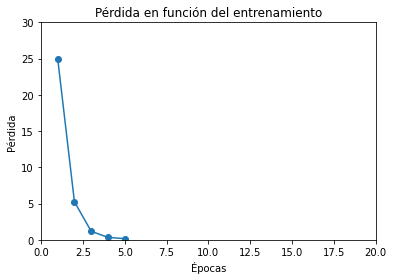

In [22]:
# Para la versión estática del cuaderno
for n in range(5):
    fit_2(modelo, x, y, 0.002)

-----

Época: 6
Pérdida: 0.12659674477464156


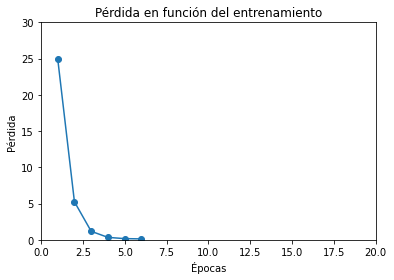

In [23]:
lr = 0.0008 #  # probar con lr=0.0008 lr = 0.003 y lr = 005 y lr = 0.008
fit_2(modelo, x, y, lr)

### Intuición del descenso de gradiente: descenso de una montaña

 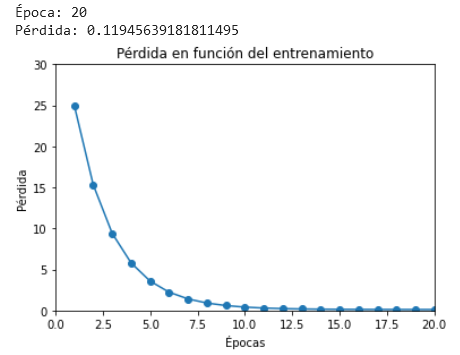 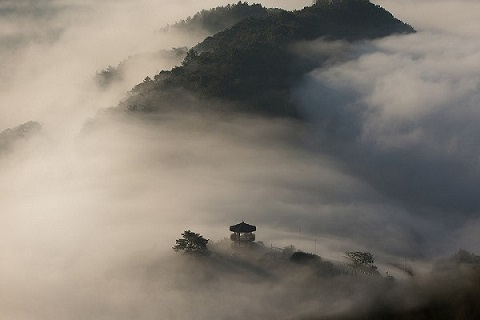

Estás paseando por el monte y te sorprende la niebla. ¿Cómo bajas al valle?

Estrategia:
1. Tanteas con el pie a tu alrededor para ver en qué dirección hay **pendiente** hacia abajo
2. Das **un pequeño paso** en esa dirección, bajando un poco.
3. **Repetir** hasta llegar a la base de la montaña

Eso mismo es lo que hace el algoritmo de descenso de gradiente.
1. Calcular la **derivada parcial** (pendiente) de la **función de coste** con respecto a cada **parámetro**
2. **Modificar ligeramente cada parámetro** según la derivada, reduciendo un poco el valor de la función de pérdida
3. **Repetir** hasta la convergencia, donde el valor de la función de pérdida es mínimo

https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

El cálculo infinitesimal fue inventado por **Newton** y **Leibniz** independientemente

### Si consultáis el libro de mates ...

La función de pérdida que vamos a usar es la función de pérdida *'L2'* que se representa así:

$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m ( \hat y_i - y_i )^2$ 

Es la mitad del error cuadrático medio (mse), y la hemos programado así:

``` 
def loss(this, y_hat, y): 
    return 0.5 * np.square(y_hat-y).mean() 
```

Las derivadas parciales (gradientes) con respecto a los parámetros son

$ \frac{d}{d\theta_0} = \frac{1}{m} \sum_{i=1}^m ( \hat y_i - y_i )$ 

$ \frac{d}{d\theta_1} = \frac{1}{m} \sum_{i=1}^m (x_i \cdot (\hat y_i - y_i ))$  

Y lo hemos programado así:

```
grad_a0 = (y_hat - y).mean()
grad_a1 = (x * (y_hat - y)).mean()
```

### ANTES DE SEGUIR ...

Jugar con el ratio de aprendizaje 

### Tercer modelo completo: Regresión Lineal con los cuatro parámetros

Para terminar con el ejemplo sólo nos falta calcular **LOS CUATRO PARÁMETROS** que multiplican a las cuatro variables del modelo del profe

#### Buenas noticias
En realidad no necesitamos implementar un algoritmo de aprendizaje máquina. Tenemos **LIBRERIAS**, como **scikit-learn** 
* De muy buena calidad
* Con licencia libre

#### Por cierto, la regresión lineal sigue siendo una herramienta a tener en cuenta
Está presenta en las principales librerías de aprendizaje máquina

![sklearn-logo.png](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png)
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [24]:
from sklearn import linear_model

# Datos de entrenamiento separado en X (variables de entrada) e Y (variable a predecir)
variables = ['LluviaInvierno', 'TemperaturaMediaVerano', 'LluviaCosecha', 'Edad']
X = data[variables].values
Y = data['Precio'].values

# Modelo de regresión lineal:
linear_regressor = linear_model.LinearRegression()

# Entrenamiento:
linear_regressor.fit(X, Y)

# Inferencia:
data['y_pred_3'] = linear_regressor.predict(data[variables].values)
data['error_3'] = data['y_pred_3'] - data['Precio']
data

,Año,LluviaInvierno,TemperaturaMediaVerano,LluviaCosecha,Edad,Precio,y_pred_0,error_0,y_pred_1,error_1,y_pred_2,error_2,y_pred_3,error_3
0,1952,600,17.1167,160,31,7.4950,7.808060,0.313060,8.0,0.5050,7.505855,0.010855,7.720643,0.225643
1,1953,690,16.7333,80,30,8.0393,8.137074,0.097774,8.0,-0.0393,7.256645,-0.782655,7.874323,-0.164977
2,1955,502,17.1500,130,28,7.6858,7.753306,0.067506,8.0,0.3142,7.527500,-0.158300,7.671104,-0.014696
3,1957,420,16.1333,110,26,6.9845,7.870822,0.886322,6.5,-0.4845,6.866645,-0.117855,6.978264,-0.006236
4,1958,582,16.4167,187,25,6.7772,8.382597,1.605397,6.5,-0.2772,7.050855,0.273655,7.020844,0.243644
5,1959,485,17.4833,187,24,8.0757,6.233975,-1.841725,8.0,-0.0757,7.744145,-0.331555,7.541267,-0.534433
6,1960,763,16.4167,290,23,6.5188,7.151520,0.632720,6.5,-0.0188,7.050855,0.532055,6.786682,0.267882
7,1961,830,17.3333,38,22,8.4937,6.316623,-2.177077,8.0,-0.4937,7.646645,-0.847055,8.378860,-0.114840
8,1962,697,16.3000,52,21,7.3880,6.433616,-0.954384,6.5,-0.8880,6.975000,-0.413000,7.508872,0.120872
9,1963,608,15.7167,155,20,6.7127,7.367762,0.655062,6.5,-0.2127,6.595855,-0.116845,6.624003,-0.088697


In [25]:
errores.loc[len(errores)] = ["Regresión lineal'", mean_squared_error(data['Precio'], data['y_pred_3'], squared=False)]
errores

,Modelo,Error (rmse)
0,Linea base,1.036610
1,Programa 'tradicional',0.611271
2,Programa 'tradicional' 2,0.466241
3,Regresión lineal',0.258614


## Comparación de nuestro resultado con el *'Paper'* del profesor

In [26]:
# Parámetros del modelo entrenado
print ("a0 = {}, a1 = {}, a2 = {}, a3 = {}, a4 = {}".format(
    linear_regressor.intercept_, 
    linear_regressor.coef_[0], 
    linear_regressor.coef_[1], 
    linear_regressor.coef_[2], 
    linear_regressor.coef_[3]))
print(variables)

a0 = -3.6515703302352254, a1 = 0.001166719144632394, a2 = 0.6163915583348174, a3 = -0.0038605996477244497, a4 = 0.02384801420540326
['LluviaInvierno', 'TemperaturaMediaVerano', 'LluviaCosecha', 'Edad']


---

$prediccion\_precio = -3.6516 + 0.0012 \cdot LluviaInvierno + 0.6164 \cdot  TemperaturaMediaVerano  - 0.0039 \cdot  LluviaCosecha +  0.0238 \cdot  Edad$

---

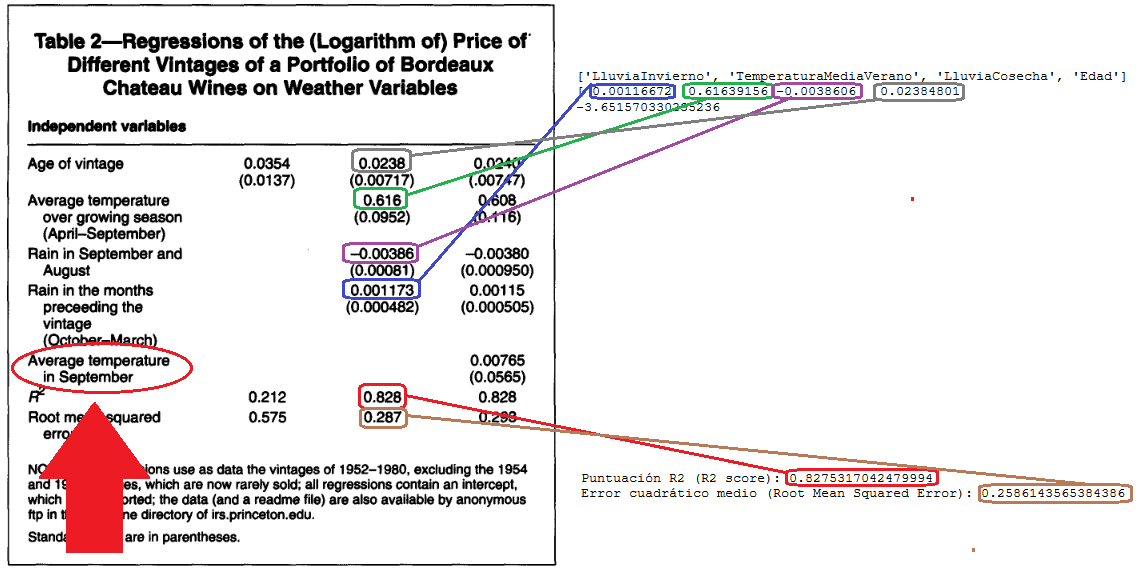

## Selección de características

¿Por qué el profesor usó **esas variables y no otras**? Seleccionar las variables es clave.

De hecho, si os fijáis en el paper que publicó, incluyó otra variable: **La temperatura media en el mes de septiembre**, durante la cosecha, descubriendo que no era significativa y no influia en el precio.

Normalmente se necesita el **conocimiento de los expertos en la materia**, en este caso, de los bodegueros franceses. De hecho, cualquier bodeguero de cualquier época y lugar sabían y saben que la meteorología es clave para calidad de la uva, y con ello, del vino.

## Ingeniería de características (Feature engieneering)

### ¿En qué se medía el **precio del vino** en la tabla del Profesor Ashenfelter? ###

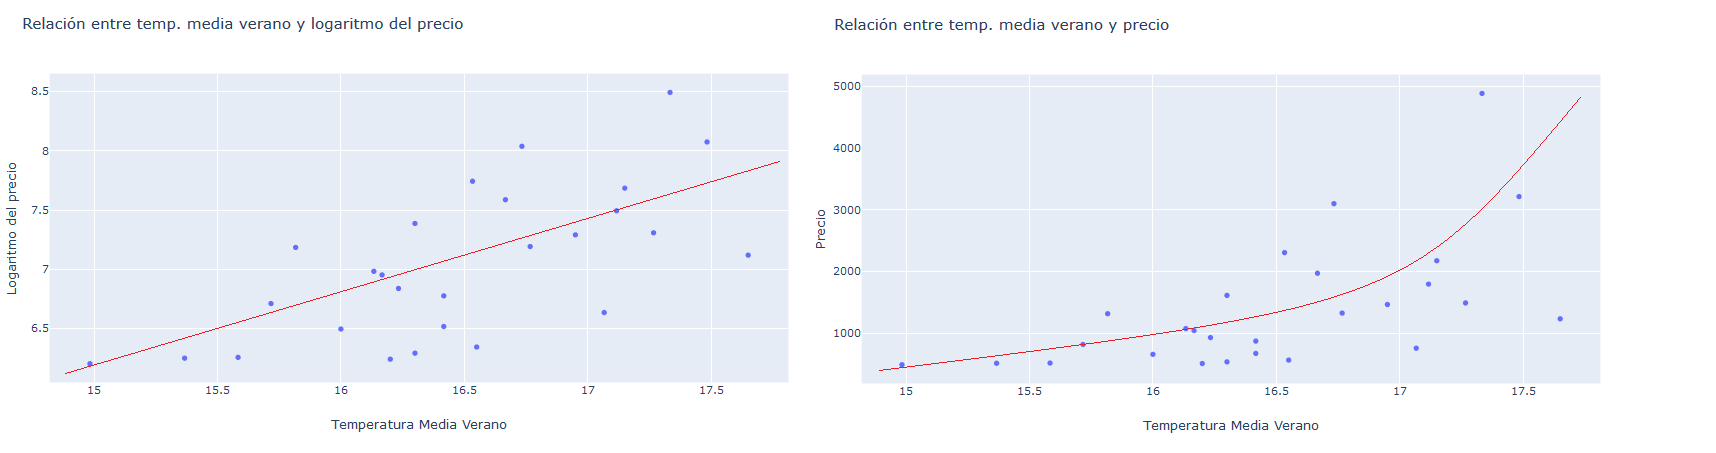

No habíamos mencionado en **qué unidad estaba el precio** en la última columna de la tabla del profesor.

En lugar de los precios de los vinos (en libras, creo) lo que tenemos en la tabla es el **logaritmo de los precios de los vinos**. En realidad, la relación entre las variables y el precio no era lineal! De ahí la transformación. Solo con calcular el logaritmo del precio, **se ajusta mucho mejor a un modelo lineal**.

#### La representación de la información de los datos de entrenamiento es crucial. **¡Hay que facilitar la vida al modelo!**

## La diferencia entre programación tradicional y aprendizaje máquina

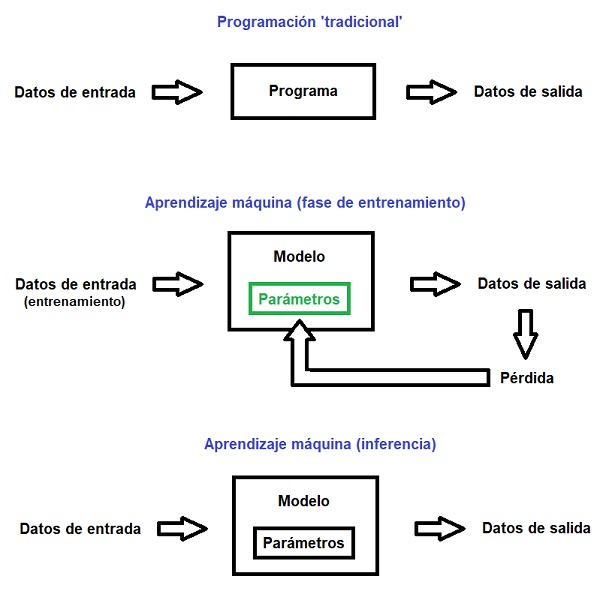

# Las claves

¿Qué hemos aprendido?

## El aprendizaje máquina (machine learning, ML) es una **alternativa viable**

Un modelo de aprendizaje máquina puede ser una **alternativa viable** cuando **no encontramos un método** que resuelva un problema programándolo de manera 'tradicional', siempre que tengamos un **conjunto de datos** de entrenamiento **representativo**, para lo cual es necesaria la participación de los **expertos en la materia**.

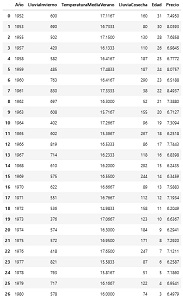   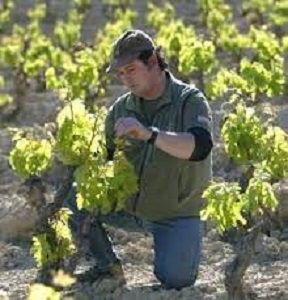

## La importancia de los datos

Hay que tener en cuenta que **casi nunca** construimos los sistemas de información pesando en la **futura explotación** de los datos que maneja.
 
En una organización (como una administración pública) es fundamental una gestión de los datos **transversal** para poder **tomar decisiones con datos**.

## Los modelos 'aprenden' con ejemplos

En eso se parecen a los seres humanos.

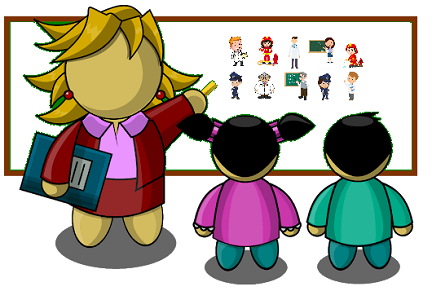

## La ciencia de datos es un proceso iterativo (experimentación)

Encontrar un modelo adecuado es un **proceso experimental iterativo**
* Si no obtenemos un resultado lo bastante bueno **puede que tengamos que**
  * Aplicar **ingeniería de características** para facilitar las cosas al modelo
  * Probar con un **modelo diferente**
  * Recabar **más datos**
* Y 'tuneando' el modelo modificando los **hiperparámetros** para conseguir que el modelo 'converja' en un tiempo razonable
* Para **evaluar** los modelos calcularmos un **error medio** que comete en sus predicciones.
   
 
Por lo tanto, tiene todo el sentido del mundo 
* Hacer estudios **de viabilidad**
* Con las correspondientes **pruebas de concepto**
 
Para asegurarse de que es **viable** construir un modelo con los datos de los que disponemos.
 
 
 
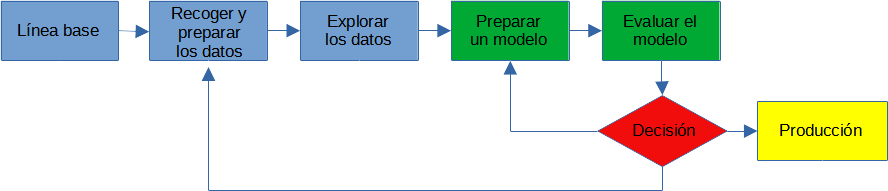

## En cuanto al paso a producción ...

Los problemas son similares al paso a producción de cualquier otro sistema de información, aunque:
* Casi siempre se trata de **integrar** el modelo en otros sistemas de información
  * Si el problema a resolver es especialmente **crítico** (p.e. sistemas médicos) puede ser complicado (p.e. necesitar **homologación**)
* Si tenemos la posibilidad de recoger **más datos** puede llegar un momento en el que podamos **perfeccionar** el modelo
  * Y si esa recogida de datos es **automática**, podemos tener **Entrenamiento contínuo**


# El entrenamiento puede ser lento y costoso

Se puede intuir que el entrenamiento puede ser **costoso** en cuanto a potencia de cálculo. El coste depende 
  * Del tamaño del conjunto de **datos** de entrenamiento.
  * Del número de **parámetros** del del modelo.
  * De la cantidad de **iteraciones** (épocas) de entrenamiento, que dependen de los hiperparámetros del modelo.
 
Hoy en día tenemos modelos con **miles de millones de parámetros entrenados con millones de datos**. En este ejemplo sólo tenemos 27 datos y 4 parámetros, pero, por ejemplo, **DALL-E 2** (publicado en 2022) tiene **3.5 miles de millones de parámetros** y se entrenó con **650 millones de imágenes**. Se estima que el coste de computación para entrenar el modelo en unos **15 millones de dólares**.


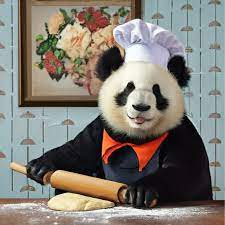



## Librerías de código abierto

Este y otros **muchos modelos** están incluidos en excelentes **librerías '*open source'***

![sklearn-logo.png](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png)



## Para terminar

Aunque este modelo de **aprendizaje máquina** sea de los años 90, la regresión lineal **sigue siendo válida** hoy en día, siempre que exista cierta **relación lineal** entre las variables de entrada (X) y el objetivo (Y). 

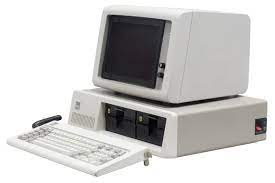

Ahora tenemos modelos mucho más **complejos**, pero se **entrenan igual**, ajustando poco a poco los parámetros del modelo para minimizar el error cometido **(optimización)** a partir de un conjunto de **datos de entrenamiento**. La optimización mediante **descenso de gradiente** (o alguna de sus variantes) sigue siendo uno de los principales métodos de optimización, y no hay ningún método de entrenamiento de aprendizaje máquina que no dependa de un algoritmo de optimización iterativo.

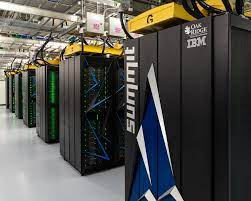